## Import dependencies and setup the csv file 
Import itertools using 'pip install itertools'
<br>Import re using 'pip install regex' 

In [1]:
import pandas as pd
import numpy as np
from more_itertools import flatten
import itertools
import re
import matplotlib.pyplot as plt

# Import the csv file and seperate at ; 
csvFile = "GCD-Week-3-GRAIN---Land-grab-deals---Jan-2012.csv"
dataFrame = pd.read_csv(csvFile, sep=';')

## Inspect data
Show some more detailed information about the data, experiment with plot library

['UAE', 'China', 'Italy', 'Portugal', 'Portugal', 'Portugal', 'UK', 'Brazil', 'China', 'Denmark', 'France', 'France', 'France', 'France', 'Germany', 'Japan', 'Saudi Arabia', 'Saudi Arabia', 'Singapore ', 'South Korea', 'US', 'Singapore ', 'Brazil', 'Canada', 'Canada', 'China', 'China', 'China', 'China', 'China', 'Denmark', 'Germany', 'Mauritius', 'Qatar', 'Singapore ', 'South Korea', 'Sweden', 'Thailand', 'UK', 'UK', 'UK', 'US', 'US', 'US ', 'China', 'China', 'Italy', 'Libya', 'Nigeria', 'Argentina', 'China', 'Argentina', 'Argentina', 'Argentina', 'Canada', 'China', 'China', 'France', 'France', 'Germany', 'India', 'Japan', 'New Zealand ', 'Portugal', 'South Korea', 'UK ', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'Bulgaria', 'China', 'UK ', 'US', 'US', 'Bangladesh', 'Australia', 'Cayman Islands', 'India', 'India', 'South Korea', 'South Korea', 'South Korea', 'Thailand', 'China', 'France', 'India', 'US', 'Singapore', 'Argentina', 'Brazil', 'China', 'Israel', 'Spain', 'US', 'Italy'

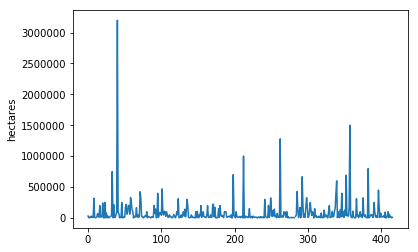

In [2]:
base = list(dataFrame['Base'])
list(dataFrame)
print(base)

# show Hectares column as plot 
plt.plot(dataFrame['Hectares'])
plt.ylabel('hectares')
plt.show()

## Cleaning data: remove whitespaces and NaN

In [3]:
# Remove whitespaces
dataFrame = dataFrame.replace({'\s*$|\n': ''}, regex = True)

# Remove NaN's
dataFrame = dataFrame.fillna('')

## output new version that is readable in Excel
dataFrame.to_csv('cleaned-version.csv')

## Fix country inconsistency
- West Africa is not a country, fix to Nigeria
- Replace Dutch with the Netherlands
- Gemany is not a country

In [4]:
## replace West Africa with Nigeria 
dataFrame = dataFrame.replace({'West Africa': 'Nigeria'})

## replace Dutch with the Netherlands
dataFrame = dataFrame.replace({'Dutch': "Netherlands"})

## replace Gemany with Germany
dataFrame = dataFrame.replace({'Gemany': "Germany"})

##dataFrame.to_csv('updated-country.csv')

## Turn 'millions' (string) into numbers, fix other issues in Project investment column

In [5]:
## get the correct column and create empty lists 
projectInvestment = dataFrame['Projected investment']
projectInvestmentNew = []
projectInvestmentCorrected = []

## function that calculates mean
def calculateMean(item):
    return np.array(item.strip().split('-')).astype(float).mean()

## replace million with ''. Also replace billion with 000 
for item in projectInvestment:
    if item != '':
        item = re.split(' \(|/', item)[0] ## clean the data
        item = item.replace('US$', '').replace(' million', '').replace(' billion', '000')
        if '-' in item:  ## if there are two values divided by a '-', calculate the mean 
             item = calculateMean(item)
    
    projectInvestmentCorrected.append(item)
    
#print(projectInvestmentCorrected)

## add cleaned data to the correct column
dataFrame['Projected investment'] = projectInvestmentCorrected

## output data to 
dataFrame.to_csv('cleaned-version-millions.csv')

## Fix products and put them in categories

In [6]:
## split products and put them in a dictionary, also replace spelling mistakes
correctProducts = {'banaba': 'banana', 'bananas': 'banana', 'biofuls': 'biofuel', 'cereal crops': 'cereal', 'cropsspeculation': 'crops', 'food crops': 'crops', 'rape; other crops': 'crops', 'dairy farm': 'dairy', 'dairy farms': 'dairy', 'forstry': 'forest', 'grains': 'grain', 'grain farms': 'grain', 'oil seeds': 'oilseeds', 'oilseed': 'oilseeds', 'oilseed rape': 'oilseeds', 'oil palm': 'palm oil', 'rape; other crops': 'rapeseed', 'rape': 'rapeseed', 'rice seeds': 'rice', 'soybean': 'soybeans', 'sugar': 'sugar cane', 'sugar beet': 'sugar cane', 'sunflowers': 'sunflower', 'sunflower seed': 'sunflower', 'sunflowers; produce & sell hybrid seeds': 'sunflower', 'vegetable oil': 'vegetables'}

products = dataFrame['Production']
updatedProducts = []
#print(products)

def replaceProducts(arr):
    return list(map(lambda item: correctProducts.get(item, item).strip(), arr))

## loop through products and use lookup (dictionary) to get the correct value by key 
for product in products:
    stripList = [product.strip().lower().split('(')[0] for product in re.split(',|and', product)]
    replaceProducts(stripList)
    updatedProducts.append(stripList)

dataFrame['Production'] = updatedProducts

## output data to 
dataFrame.to_csv('final-version-assignment-3.csv')

dataFrame.head()

,Landgrabbed,Landgrabber,Base,Sector,Hectares,Production,Projected investment,Status of deal,Summary
0,Algeria,Al Qudra,UAE,"Finance, real estate",31000,"[milk, olive oil, potatoes]",,Done,Al Qudra Holding is a joint-stock company esta...
1,Angola,CAMC Engineering Co. Ltd,China,Construction,1500,[rice],77,Done,CAMCE is a subsidiary of the China National Ma...
2,Angola,ENI,Italy,Energy,12000,[oil palm],,In process,The project is a joint venture between Sonango...
3,Angola,AfriAgro,Portugal,"Finance, real estate",5000,[oil palm],32.5,Done,AfriAgro is a subsidiary of the Portugal-based...
4,Angola,Eurico Ferreira,Portugal,"Energy, telecommunications",30000,[sugar cane],200,Done,"In 2008, Portuguese conglomerate Eurico Ferrei..."
